Loading trajectory data:
CHARMM27
    shape: (25000000, 4), range: 1.55–12.64 Å
CHARMM36m
    shape: (25000000, 4), range: 1.59–12.58 Å

Generating Free Energy Comparison Plot
  X-axis: VAL 2 N 9 - VAL 4 H 33
  Y-axis: VAL 4 O 47 - VAL 7 H 70

→ Processing CHARMM27

→ Processing CHARMM36m


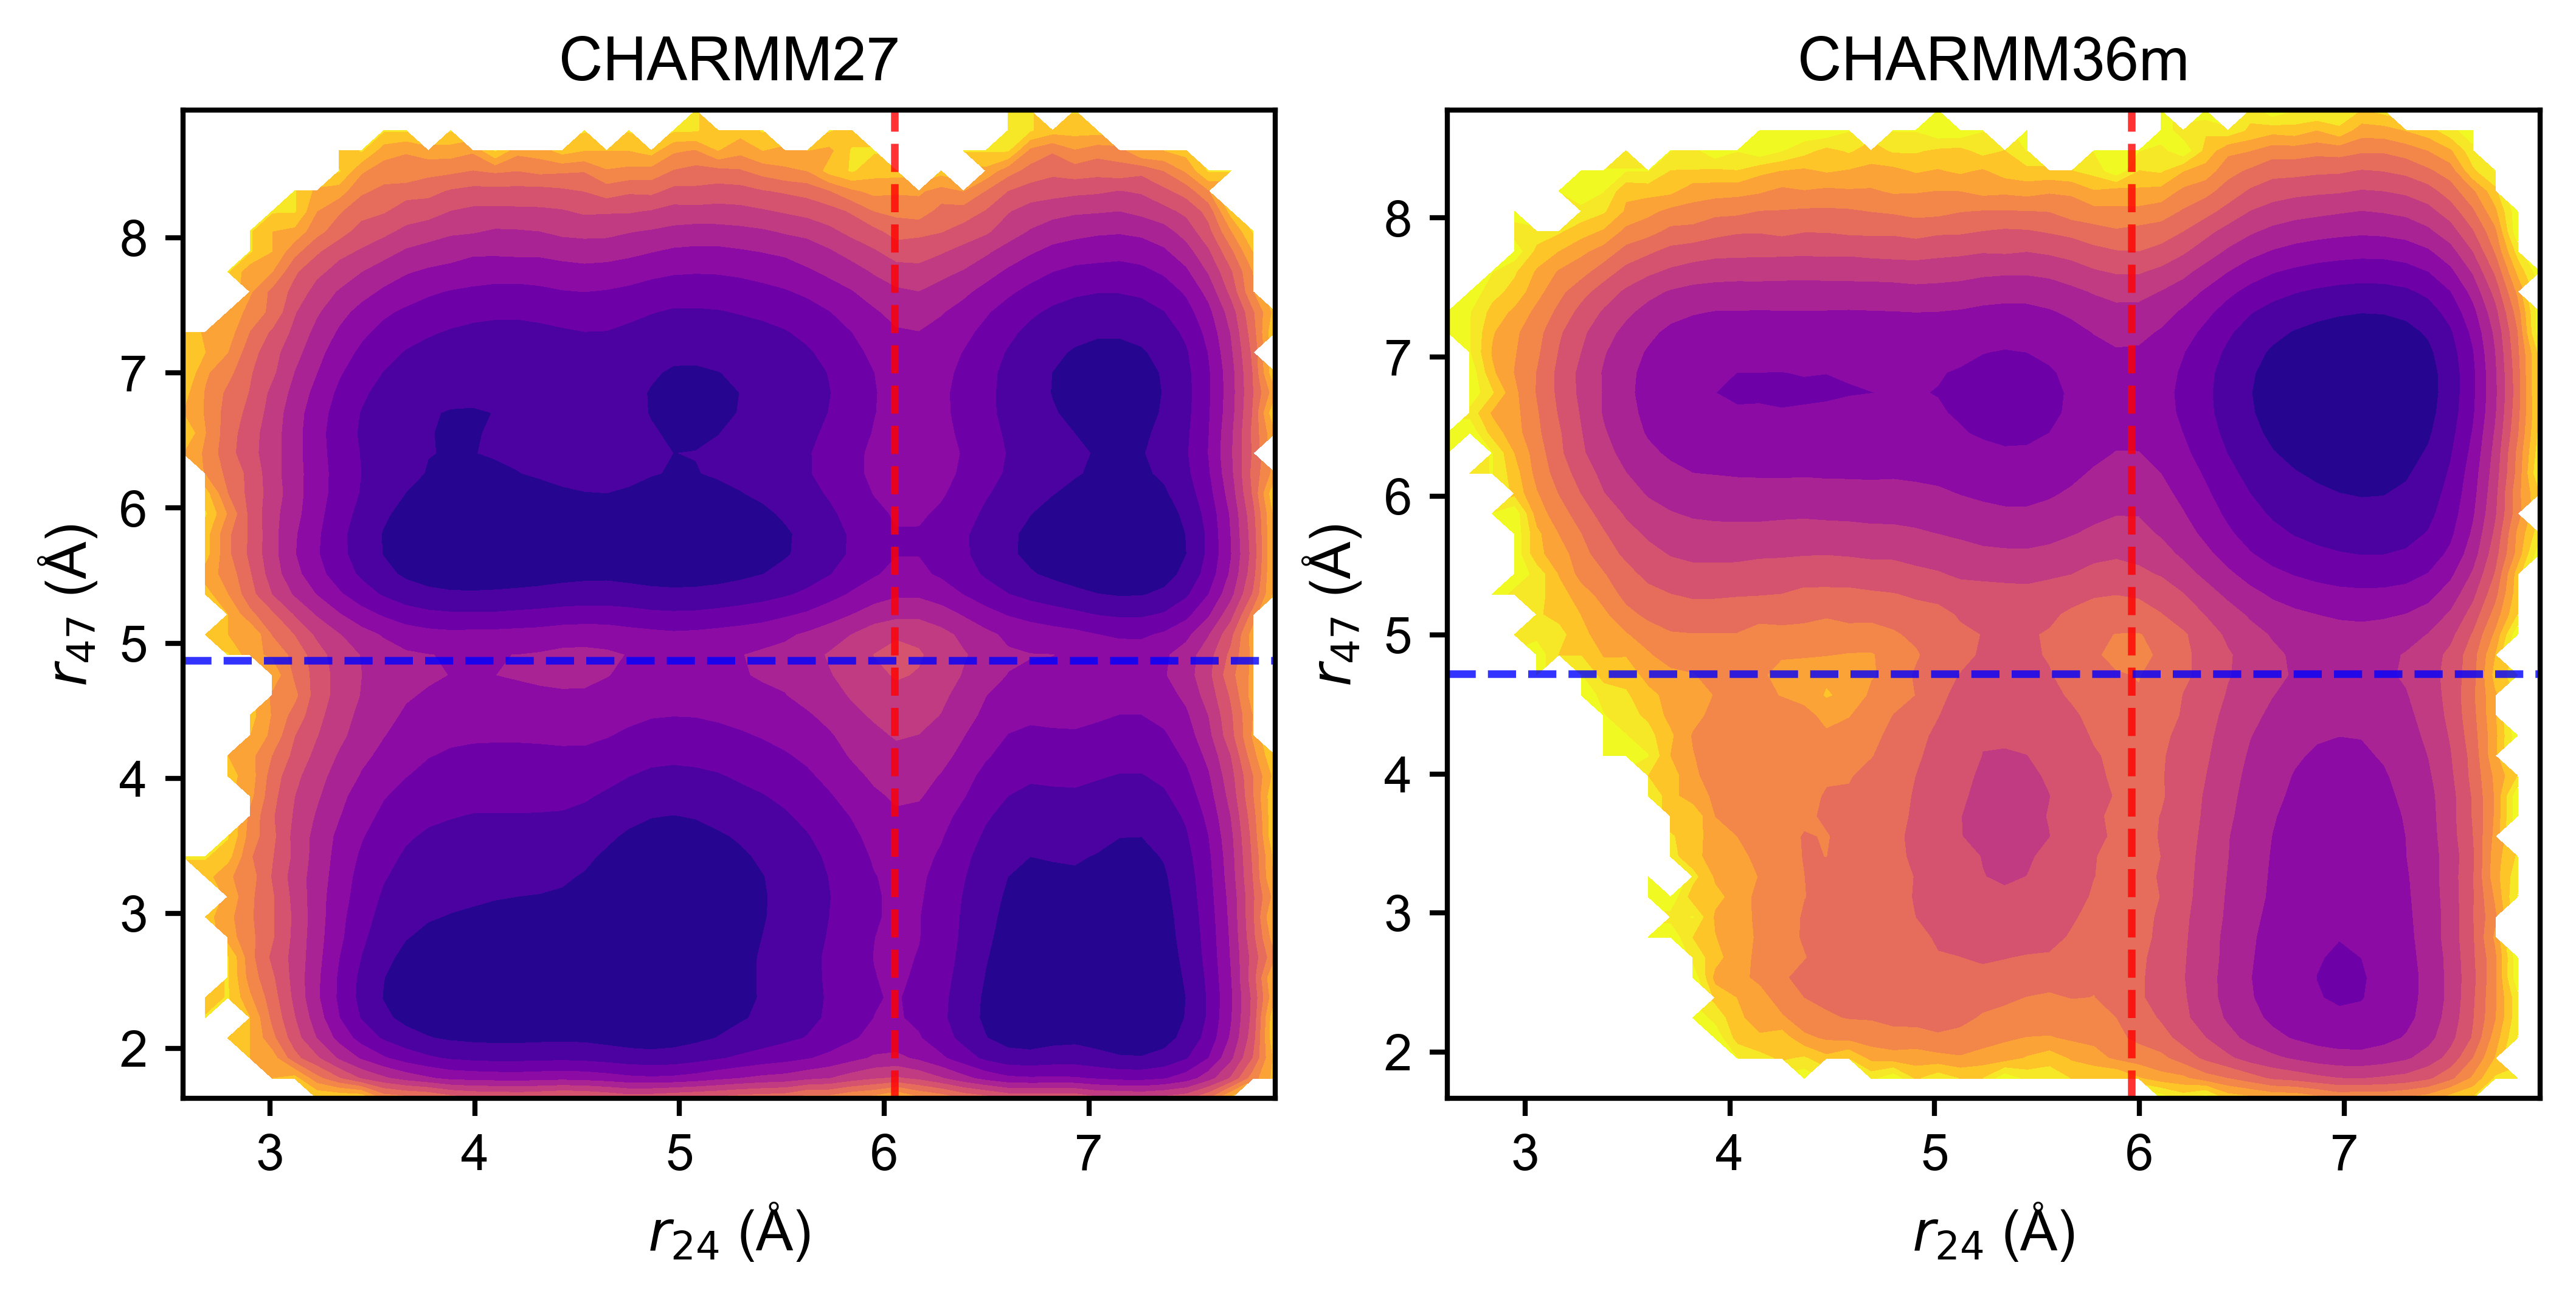

In [1]:
### PLOTS FREE ENERGY SURFACE FOR FIG 3 IN MAIN TEXT ###
### 1 Aug 2025 ###

import numpy as np
import matplotlib.pyplot as plt
import pyemma.plots as plots
from pathlib import Path

# -----------------------------------------------------------------------------
# CONFIGURATION
# -----------------------------------------------------------------------------

# Paths
BASE_DIR = Path('../data')
DATA_PATHS = {
    'CHARMM27': BASE_DIR / 'prop_array/CHARMM27_TIP3P/CV_array_CHARMM27_TIP3P.npy',
    'CHARMM36m': BASE_DIR / 'prop_array/CHARMM36m_TIP3P/CV_array_CHARMM36m_TIP3P.npy',
}

# Data Specifications
X_INDEX = 0
Y_INDEX = 2
NM_TO_ANGSTROM = 10.0
DISTANCE_LABELS = [
    'VAL 2 N 9 - VAL 4 H 33',
    'VAL 2 O 24 - GLY 6 H 63',
    'VAL 4 O 47 - VAL 7 H 70',
    'PRO 5 N 48 - VAL 7 H 70'
]

# Analysis Parameters
ENERGY_RANGE = (0, 12)
NBINS = 50
NCONTOURS = 12
REFERENCE_LINES = {
    'CHARMM27': {'x': 6.05, 'y': 4.87},
    'CHARMM36m': {'x': 5.96, 'y': 4.72}
}

# Plotting Specifications
COLORMAP = 'plasma'
FIGURE_SIZE = (7, 3.5)
DPI = 600

# -----------------------------------------------------------------------------
# DATA LOADING
# -----------------------------------------------------------------------------

def load_trajectory_data():
    """Load trajectory data for all force fields."""
    print("Loading trajectory data:")
    data = {}
    
    for name, filepath in DATA_PATHS.items():
        if not filepath.exists():
            print(f"Missing data file: {filepath}")
            continue
            
        print(name)
        raw_data = np.load(filepath)
        data[name] = raw_data * NM_TO_ANGSTROM
        print(f"    shape: {raw_data.shape}, range: {data[name].min():.2f}–{data[name].max():.2f} Å")
    
    return data

# -----------------------------------------------------------------------------
# ANALYSIS
# -----------------------------------------------------------------------------

def get_axis_label(index):
    """Get formatted axis label for given coordinate index."""
    label_id = {0: '24', 2: '47'}.get(index, str(index))
    return f"$r_{{{label_id}}}$ (Å)"

# -----------------------------------------------------------------------------
# PLOTTING
# -----------------------------------------------------------------------------

def set_plot_style():
    """Set consistent plot style for ACS publication figures."""
    plt.rcParams.update({
        # Font settings - Arial (PC) or Helvetica (Mac) as per ACS
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'Helvetica'],
        'font.size': 10,  # Will be readable at 5pt when reduced to column width
        
        # Line widths - minimum 1 pt as per ACS
        'lines.linewidth': 1.0,
        'axes.linewidth': 1.0,
        'xtick.major.width': 1.0,
        'ytick.major.width': 1.0,
        'xtick.minor.width': 1.0,
        'ytick.minor.width': 1.0,
        'patch.linewidth': 1.0,
        'grid.linewidth': 1.0,
        
        # Font sizes - accounting for reduction
        'axes.labelsize': 11,
        'axes.titlesize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        
        # DPI settings
        'figure.dpi': 600
    })


def plot_free_energy_surface(x_coords, y_coords, ax, title):
    """Plot free energy surface for given coordinates."""
    plots.plot_free_energy(
        x_coords, y_coords, ax=ax, 
        nbins=NBINS, ncontours=NCONTOURS, cmap=COLORMAP,
        cbar=False, minener_zero=True, kT=1.0, # contours represent 1 kT
        vmin=ENERGY_RANGE[0], vmax=ENERGY_RANGE[1]
    )
    ax.set_title(title)
    ax.set_xlabel(get_axis_label(X_INDEX))
    ax.set_ylabel(get_axis_label(Y_INDEX))

def add_reference_lines(ax, force_field_name):
    """Add reference lines to free energy surface plot."""
    if force_field_name in REFERENCE_LINES:
        ref = REFERENCE_LINES[force_field_name]
        ax.axvline(ref['x'], color='red', linestyle='--', linewidth=1.5, alpha=0.8)
        ax.axhline(ref['y'], color='blue', linestyle='--', linewidth=1.5, alpha=0.8)

# -----------------------------------------------------------------------------
# MAIN
# -----------------------------------------------------------------------------

def main():
    """Main function to generate the plot."""
    set_plot_style()
    
    # Load data
    trajectory_data = load_trajectory_data()

    print("\n" + "="*50)
    print("Generating Free Energy Comparison Plot")
    print(f"  X-axis: {DISTANCE_LABELS[X_INDEX]}")
    print(f"  Y-axis: {DISTANCE_LABELS[Y_INDEX]}")
    print("="*50)

    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=FIGURE_SIZE)

    # Plot each force field
    for idx, (force_field_name, data) in enumerate(trajectory_data.items()):
        print(f"\n→ Processing {force_field_name}")
        
        x_coordinates = data[:, X_INDEX]
        y_coordinates = data[:, Y_INDEX]

        plot_free_energy_surface(x_coordinates, y_coordinates, axes[idx], force_field_name)
        add_reference_lines(axes[idx], force_field_name)

    plt.tight_layout(pad=0.5)
    plt.show()

if __name__ == "__main__":
    main()